#### JWST data_2

In [204]:
import os
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [205]:
print('cwd', os.getcwd())

## data
data2 = fits.open('./data/level_2/jw01271008001_03102_00001_nrcblong_o008_crf.fits')

data2.info()

cwd c:\Users\topol\JWST
Filename: ./data/level_2/jw01271008001_03102_00001_nrcblong_o008_crf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     349   ()      
  1  SCI           1 ImageHDU        96   (64, 64)   float32   
  2  ERR           1 ImageHDU        10   (64, 64)   float32   
  3  DQ            1 ImageHDU        11   (64, 64)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (64, 64)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (64, 64)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (64, 64)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (64, 64)   float32   
  8  ASDF          1 BinTableHDU     11   1R x 1C   [25892B]   


In [206]:
## define header data units
data2_hdu1 = data2[1].data
data2_hdu2 = data2[2].data
data2_hdu3 = data2[3].data
data2_hdu4 = data2[4].data
data2_hdu5 = data2[5].data
data2_hdu6 = data2[6].data

In [207]:
print(data2_hdu1)

[[  1.3659017   -1.7285033   -1.1888608  ...   0.6135082   -1.85926
   -7.643013  ]
 [ -1.9606619   -1.2141658    0.3449911  ...   1.5481423    3.1066532
   -2.25179   ]
 [ -1.936684    -1.7103947   -1.9693197  ...   7.555581   -13.281949
   -1.4884686 ]
 ...
 [ -0.781565    -2.2724776   -2.2263021  ...  -2.8733244   -1.5015517
    0.39128205]
 [ -0.7244975   -1.857952    -2.6546328  ...  -1.8490502   -5.764595
   -1.9992735 ]
 [  0.17435755  -0.27106     -1.0076354  ...   2.0391695    4.407325
   -0.98826635]]


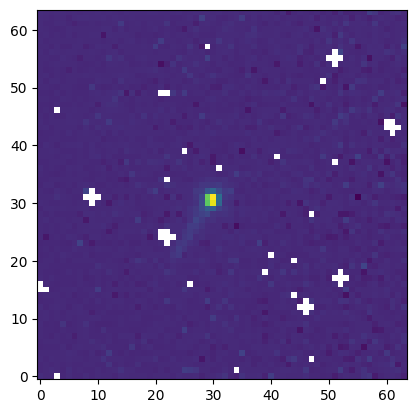

In [208]:
## plot1
plt.figure()

plt.imshow(data2_hdu1, origin= 'lower')

plt.show()

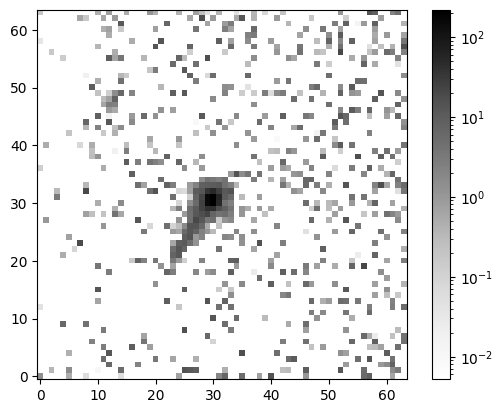

In [209]:
## change color
## plot
plt.figure()

plt.imshow(data2_hdu1, origin= 'lower', norm= LogNorm(), cmap= 'Greys')
plt.colorbar()

plt.show()

In [210]:
## check missing values
np.isnan(data2_hdu1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [211]:
np.isnan(data2_hdu1).sum()

54

In [212]:
## replace all missing values with the mean
mean_value = np.nanmean(data2_hdu1)
data2_hdu1 = np.where(np.isnan(data2_hdu1), mean_value, data2_hdu1)

In [213]:
np.isnan(data2_hdu1).sum()

0

In [214]:
## stats, mean, median
from astropy.stats import sigma_clipped_stats

mean, median, std = sigma_clipped_stats(data2_hdu1, sigma= 3.0)

print(mean, median, std)

-1.5894615650177002 -1.6010801792144775 1.5404152870178223


In [215]:
data2_hdu1

array([[  1.3659017 ,  -1.7285033 ,  -1.1888608 , ...,   0.6135082 ,
         -1.85926   ,  -7.643013  ],
       [ -1.9606619 ,  -1.2141658 ,   0.3449911 , ...,   1.5481423 ,
          3.1066532 ,  -2.25179   ],
       [ -1.936684  ,  -1.7103947 ,  -1.9693197 , ...,   7.555581  ,
        -13.281949  ,  -1.4884686 ],
       ...,
       [ -0.781565  ,  -2.2724776 ,  -2.2263021 , ...,  -2.8733244 ,
         -1.5015517 ,   0.39128205],
       [ -0.7244975 ,  -1.857952  ,  -2.6546328 , ...,  -1.8490502 ,
         -5.764595  ,  -1.9992735 ],
       [  0.17435755,  -0.27106   ,  -1.0076354 , ...,   2.0391695 ,
          4.407325  ,  -0.98826635]], dtype=float32)

In [216]:
print((data2_hdu1 - median).shape)

(64, 64)


In [217]:
## create a table for my data set, including the magnitudes of stars found in hdu1
from photutils.detection import DAOStarFinder

daofind = DAOStarFinder(fwhm= 3.0, threshold= 5.0 * std)     ## fwhm is Full Width at Half Maximum

sources = daofind(data2_hdu1 - median)

for column in sources.colnames:
    if column not in ('id', 'npix'):
        sources[column].info.format = '%.2f'

sources.pprint(max_width= 76)        

 id xcentroid ycentroid sharpness roundness1 ... sky   peak   flux  mag 
--- --------- --------- --------- ---------- ... ---- ------ ----- -----
  1     56.14      0.10      0.44       0.24 ... 0.00   7.17  1.54 -0.47
  2     25.69      0.97      0.63      -0.51 ... 0.00  13.06  1.72 -0.59
  3     44.09      3.22      0.89      -0.52 ... 0.00  11.73  1.45 -0.40
  4     17.35     19.92      0.88      -0.09 ... 0.00   9.09  1.10 -0.10
  5     33.31     19.90      0.81       0.69 ... 0.00  10.48  1.20 -0.20
  6     29.68     30.47      0.58       0.62 ... 0.00 220.35 25.69 -3.52
  7     59.08     32.87      0.79       0.21 ... 0.00  17.73  2.49 -0.99
  8     46.43     33.66      0.57       0.01 ... 0.00   7.89  1.20 -0.20
  9     45.42     44.69      0.55      -0.62 ... 0.00   4.92  1.02 -0.02
 10     52.23     44.65      0.92      -0.06 ... 0.00  14.72  1.42 -0.38
 11     39.23     53.28      0.31      -0.50 ... 0.00   1.47  1.19 -0.19
 12     57.00     57.72      0.24      -0.06 ... 0.

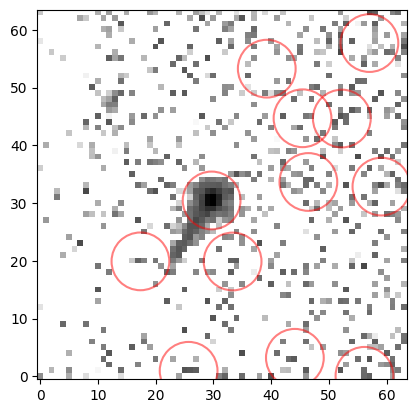

In [218]:
## circle all the stars
from photutils.aperture import CircularAperture

pos = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(pos, r= 5.0)
plt.imshow(data2_hdu1, cmap= 'Greys', origin= 'lower', norm= LogNorm(), interpolation= 'nearest')

apertures.plot(color= 'red', lw= 1.5, alpha= 0.5)
plt.show();

#### 12 stars found!!

#### we can now call Aparture photometry
#### Aparture photometry is the tool used to quantify brightness of stars by analysing their flux

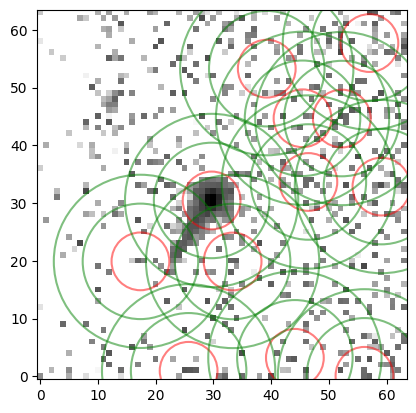

In [219]:
from photutils.aperture import CircularAnnulus, ApertureStats, aperture_photometry

annulus_aperture = CircularAnnulus(pos, r_in= 10, r_out= 15)

plt.figure()
plt.imshow(data2_hdu1, cmap= 'Greys', norm= LogNorm(), origin= 'lower')
apertures.plot(color= 'red', lw= 1.5, alpha= 0.5);
annulus_aperture.plot(color= 'green', lw= 1.5, alpha= 0.5);

plt.show()

In [220]:
## define the background
aperstats = ApertureStats(data2_hdu1, annulus_aperture)
bkg_mean = aperstats.mean
aperture_area = apertures.area_overlap(data2_hdu1)
total_bkg = bkg_mean * aperture_area

star_data = aperture_photometry(data2_hdu1, apertures)

star_data['total_bkgnd'] = total_bkg

for column in star_data.colnames:
    star_data[column].info.format = '%.8g'

star_data.pprint()

 id  xcenter    ycenter   aperture_sum total_bkgnd
       pix        pix                             
--- --------- ----------- ------------ -----------
  1 56.143834 0.098672033   -65.530564  -81.075919
  2 25.694792  0.96886393   -73.345927  -77.797915
  3  44.09426   3.2178846   -118.63818  -115.47735
  4 17.350299   19.918765   -156.54485  -67.096555
  5 33.312276     19.8962   -63.084636   135.55687
  6 29.676821   30.466405    1424.5301  -97.792111
  7 59.081287   32.865644   -146.80521  -106.76187
  8 46.431828   33.663461   -102.54258  -117.56542
  9 45.418614   44.694449   -133.41323  -110.46659
 10 52.225114    44.64662   -66.458239  -119.47914
 11 39.225015   53.284373   -138.65567  -103.13392
 12        57   57.718604   -102.81483  -137.39961


In [221]:
##